# Lab 5: K-Means and PCA

## Author: Eric Perry

## Part A: The Iris Dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Step A: Read in Dataset and Display Descriptive Statistics

In [2]:
# Read in the iris dataset from the CSV file
# The CSV file contains the header row 
# specifying the column names 
iris_data = pd.read_csv('iris.csv')

In [3]:
iris_data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_data.tail(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

In [7]:
iris_data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [8]:
# Produce a list of the record count 
# for each Species
iris_data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
# Group the Species and run descriptive statistics
# Transpose the DataFrame to view the statistics 
# in a readable form.
iris_data.groupby(['Species']).describe().T

Species            Iris-setosa  Iris-versicolor  Iris-virginica
PetalLength count    50.000000        50.000000       50.000000
            mean      1.462000         4.260000        5.552000
            std       0.173664         0.469911        0.551895
            min       1.000000         3.000000        4.500000
            25%       1.400000         4.000000        5.100000
            50%       1.500000         4.350000        5.550000
            75%       1.575000         4.600000        5.875000
            max       1.900000         5.100000        6.900000
PetalWidth  count    50.000000        50.000000       50.000000
            mean      0.246000         1.326000        2.026000
            std       0.105386         0.197753        0.274650
            min       0.100000         1.000000        1.400000
            25%       0.200000         1.200000        1.800000
            50%       0.200000         1.300000        2.000000
            75%       0.300000         1.500000        2.300000
            max       0.600000         1.800000        2.500000
SepalLength count    50.000000        50.000000       50.000000
            mean      5.006000         5.936000        6.588000
            std       0.352490         0.516171        0.635880
            min       4.300000         4.900000        4.900000
            25%       4.800000         5.600000        6.225000
            50%       5.000000         5.900000        6.500000
            75%       5.200000         6.300000        6.900000
            max       5.800000         7.000000        7.900000
SepalWidth  count    50.000000        50.000000       50.000000
            mean      3.428000         2.770000        2.974000
            std       0.379064         0.313798        0.322497
            min       2.300000         2.000000        2.200000
            25%       3.200000         2.525000        2.800000
            50%       3.400000         2.800000        3.000000
            75%       3.675000         3.000000        3.175000
            max       4.400000         3.400000        3.800000

### Step B: Examine the Relationship Between the Variables

In [10]:
# Run the correlation matrix
iris_corr = iris_data.corr()
iris_corr

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


In [11]:
features = ['SepalLength','SepalWidth',
            'PetalLength','PetalWidth']

grps = ['NegStrong', 'NegMedium','Weak', 
        'PosMedium', 'PosStrong']
for col in features:
    iris_corr[col] = pd.cut(iris_corr[col], 
                     (-1,-0.7,-0.5,0.5,0.7,1),
                     labels = grps)
iris_corr

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,PosStrong,Weak,PosStrong,PosStrong
SepalWidth,Weak,PosStrong,Weak,Weak
PetalLength,PosStrong,Weak,PosStrong,PosStrong
PetalWidth,PosStrong,Weak,PosStrong,PosStrong


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


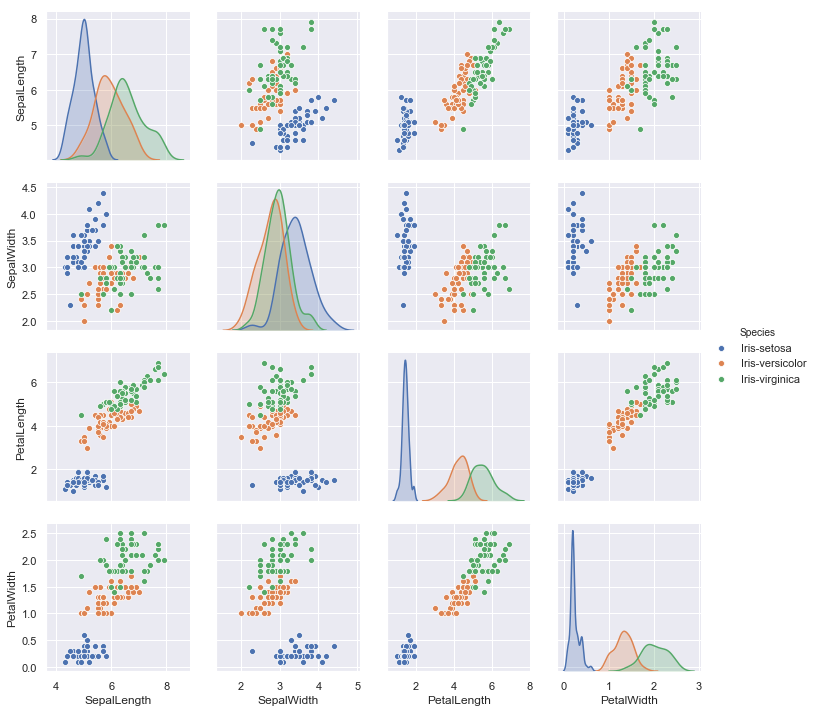

In [12]:
sns.pairplot(iris_data, hue='Species')

In [13]:
# Use matplotlib to display individual 
# scatterplot matrices
# 1: Use the Pandas factorize function to produce a #    NumPy array with numeric designations for the
#    species category
species_category = pd.factorize(iris_data['Species'])
species_category

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object'))

In [14]:
 # 2: Let Y_iris hold the numpy array, 
 #    the first element
 Y_iris = species_category[0]
 Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [15]:
# 3: You also need a list of the names of the
# flower features.
iris_features = ['Sepal Length','Sepal Width',
                 'Petal Length','Petal Width']

Text(0, 0.5, 'Sepal Width')

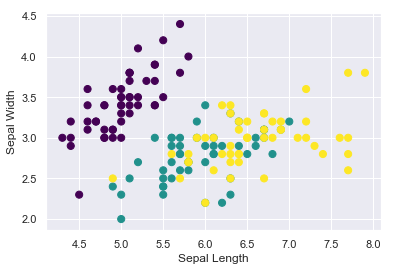

In [16]:
# 4: Display the scatter plot for 
#    Sepal Length and Sepal Width
x = 0  # Column Sepal Length
y = 1  # Column Sepal Width
plt.scatter(iris_data.iloc[:,x], 
            iris_data.iloc[:,y], 
            c = Y_iris, s = 50,cmap = 'viridis')
plt.xlabel(iris_features[x])
plt.ylabel(iris_features[y])

Text(0, 0.5, 'Petal Width')

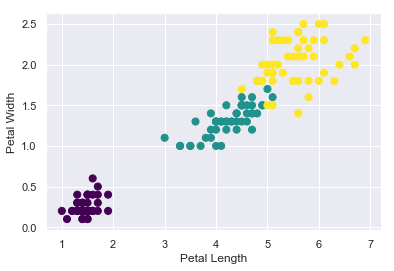

In [17]:
# 5: Display the scatter plot for 
#    Petal Length and Petal Width
x = 2  # Column Petal Length
y = 3  # Column Petal Width
plt.scatter(iris_data.iloc[:,x], 
            iris_data.iloc[:,y], 
            c = Y_iris, s = 50,cmap = 'viridis')
plt.xlabel(iris_features[x])
plt.ylabel(iris_features[y])

### Step C: K-Means Clustering

In [18]:
# Drop the Species column
X_iris = iris_data.drop('Species', axis=1)
X_iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# Run the KMeans algorithm on the X_iria DataFrame, 
# specifying 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(X_iris)
y_model = kmeans.predict(X_iris)

In [20]:
# Display the y_model array
y_model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
# Create y_test to hold the numpy array with the 
# species categories changed to (1,0,2)
y_test = np.choose(Y_iris,[1,0,2]).astype(int)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# Display the accuracy score for the clustering
acc_score = accuracy_score(y_test, y_model)
acc_score

0.8933333333333333

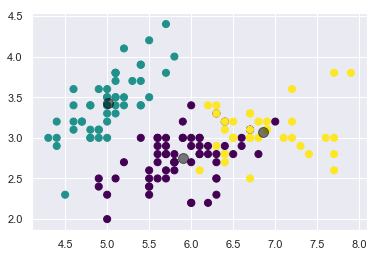

In [23]:
# Display the scatter plot from the KMeans
# algorithm for Sepal Length and Sepal Width 
# with centroids
x = 0  # Column Sepal Length
y = 1  # Column Sepal Width
plt.scatter(X_iris.iloc[:,x], X_iris.iloc[:,y],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,x], centers[:,y],
            c = 'black', s = 100, alpha = 0.5);

In [24]:
# Display the confusion matrix using an array 

mat = confusion_matrix(y_test, y_model)
print(mat)

[[48  0  2]
 [ 0 50  0]
 [14  0 36]]


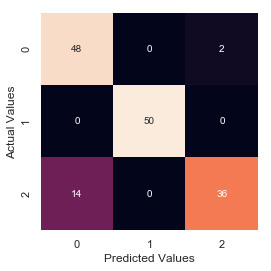

In [25]:
# Display the confusion matrix using a heat map 
sns.heatmap(mat, square=True, annot=True,
                 cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

### Step D: PCA

In [26]:
# Let's run the PCA algorithm, specifying the
# return of the first two principal components
# The data will be transformed into the two
# dimensions with the best possible separation
model = PCA(n_components = 2) 
model.fit(X_iris) 
X_2D = model.transform(X_iris)

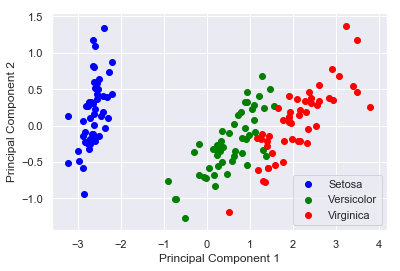

In [27]:
# Use matplotlib scatter plot to display the 
# First two principal components of the Iris
# dataset
for label, color, i in zip(('Setosa','Versicolor','Virginica'), ('blue', 'green' ,'red'), (0, 1, 2)):
    plt.scatter(X_2D[Y_iris == i, 0], X_2D[Y_iris == i, 1], label = label, color = color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc = 'lower right')

In [28]:
# Display the percentage of total variance for each
# of the first two components
model.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [29]:
# Display the total percentage of total variance 
# for each of the first two components
sum(model.explained_variance_ratio_)

0.977685206318795

### Step E: Standardization Before K-Means

In [30]:
# Rescale the features using Standardization 
X_std_iris = StandardScaler().fit_transform(X_iris)
X_std_iris[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [31]:
# Run the KMeans clustering on the 
# Standardized data
kmeans = KMeans(n_clusters=3, random_state = 1)
kmeans.fit(X_std_iris)
y_model = kmeans.predict(X_std_iris) 
y_model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [32]:
# Display the accuracy score for the clustering 
acc_score = accuracy_score(y_test, y_model)
acc_score

0.8333333333333334

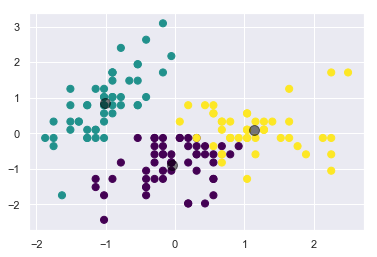

In [33]:
# Display the scatter plot from the 
# KMeans algorithm 
# For Sepal Length and Sepal Width with centroids
x = 0  # Column Petal Length
y = 1  # Column Petal Width
plt.scatter(X_std_iris[:,x], X_std_iris[:,y], c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,x], centers[:,y], c = 'black', s = 100, alpha = 0.5)

In [34]:
mat = confusion_matrix(y_test, y_model)
print(mat)

[[39  0 11]
 [ 0 50  0]
 [14  0 36]]


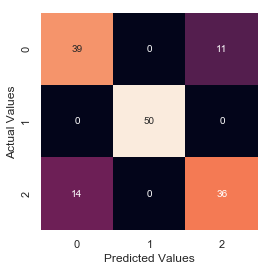

In [35]:
sns.heatmap(mat, square = True, annot = True, 
            cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

### Step F: Normalization Before K-Means

In [36]:
# Load the min max scaler
sc = MinMaxScaler()
# Scale the training data to be in interval [0, 1]
sc.fit(X_iris)
X_norm_iris = sc.transform(X_iris)
X_norm_iris[:5,:]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [37]:
# Run the KMeans clustering on the Normalized data 
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(X_norm_iris)
y_model = kmeans.predict(X_norm_iris)
y_model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [38]:
# Display the accuracy score for the clustering 
acc_score = accuracy_score(y_test, y_model)
acc_score

0.8866666666666667

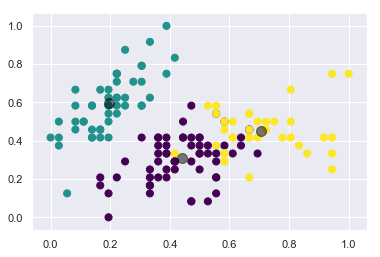

In [39]:
# Display the scatter plot from the 
# KMeans algorithm for Sepal Length and Sepal Width
# with centroids
x = 0  # Column Petal Length
y = 1  # Column Petal Width
plt.scatter(X_norm_iris[:,x], X_norm_iris[:,y], c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,x], centers[:,y], c = 'black', s = 100, alpha = 0.5);

In [40]:
# Display the confusion matrix using an array
mat = confusion_matrix(y_test, y_model)
print(mat)

[[47  0  3]
 [ 0 50  0]
 [14  0 36]]


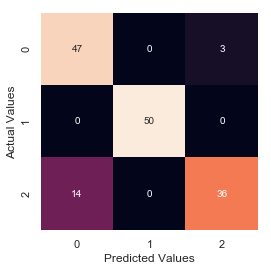

In [41]:
# Display the confusion matrix using a heat map
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

### Part B: The Seeds Dataset

In [42]:
cols = ['area','perimeter','compact','length',
        'width','asym','groove','species']
seed_data = pd.read_csv('seeds.csv', names = cols)
seed_data.head(10)

,area,perimeter,compact,length,width,asym,groove,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [43]:
seed_data.tail(10)

,area,perimeter,compact,length,width,asym,groove,species
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [44]:
seed_data.shape

(210, 8)

In [45]:
seed_data.dtypes

area         float64
perimeter    float64
compact      float64
length       float64
width        float64
asym         float64
groove       float64
species        int64
dtype: object

In [46]:
seed_data.isnull().sum()

area         0
perimeter    0
compact      0
length       0
width        0
asym         0
groove       0
species      0
dtype: int64

In [47]:
seed_data['species'].value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

In [48]:
seed_data.groupby('species').describe().T

species                  1          2          3
area      count  70.000000  70.000000  70.000000
          mean   14.334429  18.334286  11.873857
          std     1.215704   1.439496   0.723004
          min    11.230000  15.380000  10.590000
          25%    13.750000  17.330000  11.262500
          50%    14.355000  18.720000  11.835000
          75%    15.045000  19.137500  12.425000
          max    17.080000  21.180000  13.370000
asym      count  70.000000  70.000000  70.000000
          mean    2.667403   3.644800   4.788400
          std     1.173901   1.181868   1.336465
          min     0.765100   1.472000   1.661000
          25%     1.826500   2.845500   4.048750
          50%     2.545500   3.609500   4.839000
          75%     3.301000   4.436000   5.467250
          max     6.685000   6.682000   8.456000
compact   count  70.000000  70.000000  70.000000
          mean    0.880070   0.883517   0.849409
          std     0.016191   0.015500   0.021760
          min     0.839200   0.845200   0.808100
          25%     0.868850   0.872525   0.834000
          50%     0.880500   0.882600   0.849350
          75%     0.890400   0.898225   0.861825
          max     0.918300   0.910800   0.897700
groove    count  70.000000  70.000000  70.000000
          mean    5.087214   6.020600   5.116400
          std     0.263699   0.253934   0.162068
          min     4.519000   5.144000   4.745000
          25%     4.924500   5.877500   5.002000
          50%     5.094000   5.981500   5.091500
          75%     5.223500   6.187750   5.228500
          max     5.877000   6.550000   5.491000
length    count  70.000000  70.000000  70.000000
          mean    5.508057   6.148029   5.229514
          std     0.231508   0.268191   0.138015
          min     4.902000   5.363000   4.899000
          25%     5.384500   5.979250   5.136250
          50%     5.534000   6.148500   5.224000
          75%     5.677000   6.312000   5.323750
          max     6.053000   6.675000   5.541000
perimeter count  70.000000  70.000000  70.000000
          mean   14.294286  16.135714  13.247857
          std     0.576583   0.616995   0.340196
          min    12.630000  14.660000  12.410000
          25%    13.960000  15.737500  13.002500
          50%    14.320000  16.210000  13.250000
          75%    14.732500  16.557500  13.470000
          max    15.460000  17.250000  13.950000
width     count  70.000000  70.000000  70.000000
          mean    3.244629   3.677414   2.853771
          std     0.177616   0.185539   0.147516
          min     2.850000   3.231000   2.630000
          25%     3.134250   3.554250   2.725500
          50%     3.243500   3.693500   2.834500
          75%     3.378500   3.804750   2.967000
          max     3.683000   4.033000   3.232000

### Step B: Examine the Relationship Between the Variables

In [49]:
seed_corr = seed_data.corr()
seed_corr

,area,perimeter,compact,length,width,asym,groove,species
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compact,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asym,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
species,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [50]:
grps = ['NegStrong', 'NegMedium','Weak', 
        'PosMedium', 'PosStrong']
for col in cols:
    seed_corr[col] = pd.cut(seed_corr[col], 
                     (-1,-0.7,-0.5,0.5,0.7,1),
                     labels = grps)
seed_corr

,area,perimeter,compact,length,width,asym,groove,species
area,PosStrong,PosStrong,PosMedium,PosStrong,PosStrong,Weak,PosStrong,Weak
perimeter,PosStrong,PosStrong,PosMedium,PosStrong,PosStrong,Weak,PosStrong,Weak
compact,PosMedium,PosMedium,PosStrong,Weak,PosStrong,Weak,Weak,NegMedium
length,PosStrong,PosStrong,Weak,PosStrong,PosStrong,Weak,PosStrong,Weak
width,PosStrong,PosStrong,PosStrong,PosStrong,PosStrong,Weak,PosStrong,Weak
asym,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,PosMedium
groove,PosStrong,PosStrong,Weak,PosStrong,PosStrong,Weak,PosStrong,Weak
species,Weak,Weak,NegMedium,Weak,Weak,PosMedium,Weak,PosStrong


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


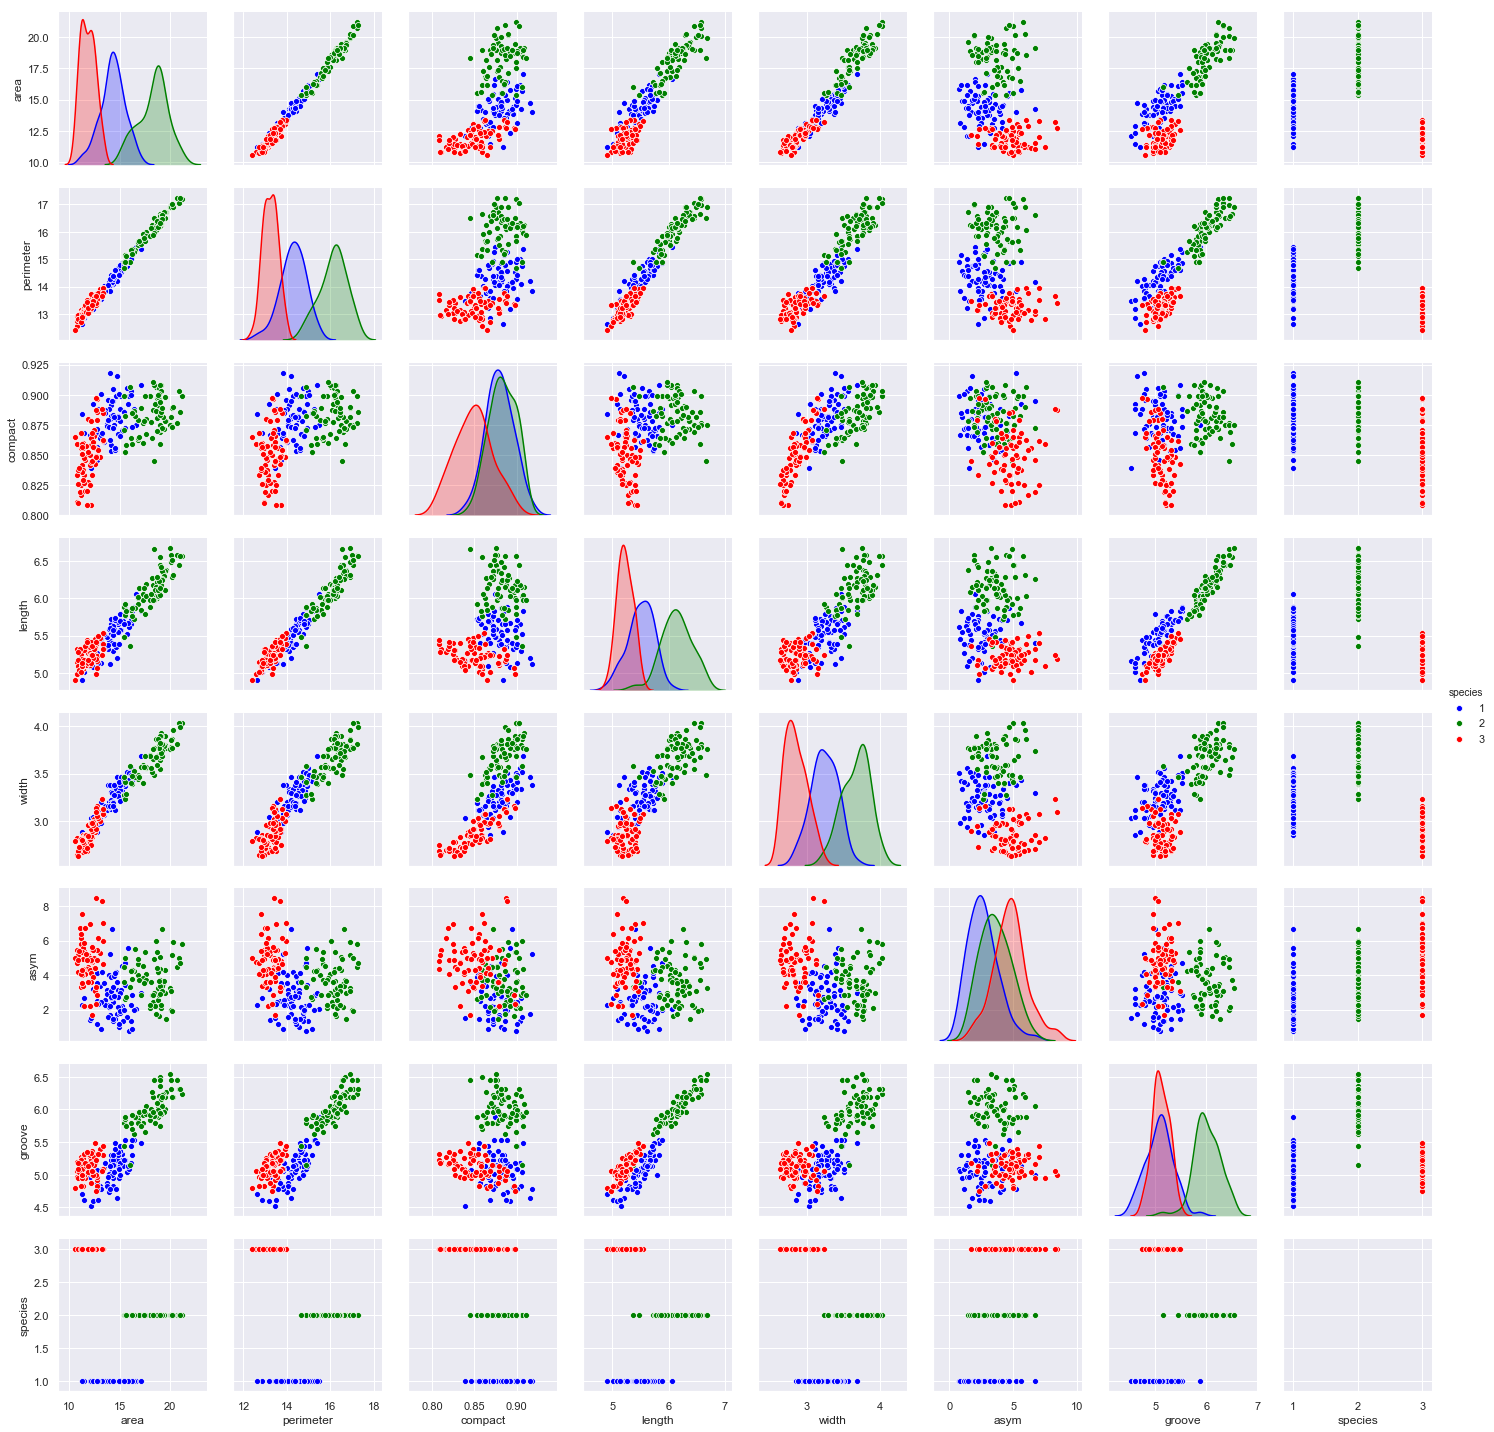

In [51]:
sns.pairplot(seed_data, hue='species', palette = ['blue', 'green', 'red'])

In [52]:
species_category = pd.factorize(seed_data['species'])
Y_seed = species_category[0]
Y_seed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Area vs Perimeter

Text(0, 0.5, 'Perimeter')

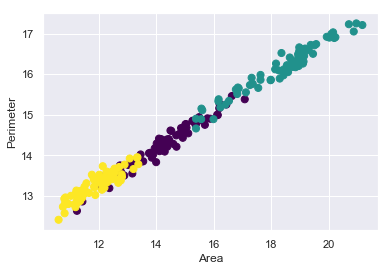

In [53]:
x = 0  # Area
y = 1  # Perimeter
plt.scatter(seed_data.iloc[:,x], 
            seed_data.iloc[:,y], 
            c = Y_seed, s = 50,cmap = 'viridis')
plt.xlabel('Area')
plt.ylabel('Perimeter')

### Area vs Width

Text(0, 0.5, 'Width')

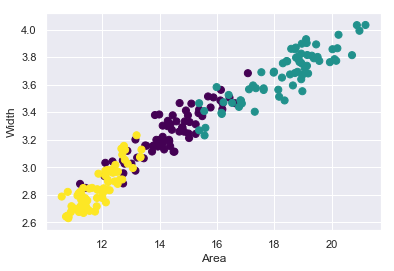

In [54]:
x = 0  # Area
y = 4  # Width
plt.scatter(seed_data.iloc[:,x], 
            seed_data.iloc[:,y], 
            c = Y_seed, s = 50,cmap = 'viridis')
plt.xlabel('Area')
plt.ylabel('Width')

### Perimeter vs Length

Text(0, 0.5, 'Length')

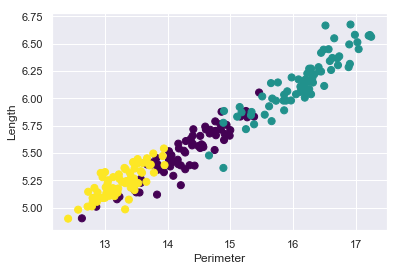

In [55]:
x = 1  # Perimeter
y = 3  # Length
plt.scatter(seed_data.iloc[:,x], 
            seed_data.iloc[:,y], 
            c = Y_seed, s = 50,cmap = 'viridis')
plt.xlabel('Perimeter')
plt.ylabel('Length')

### Step C: K-Means Clustering

In [56]:
# Drop the Species column
X_seed = seed_data.drop('species', axis=1)
X_seed.head(5)

,area,perimeter,compact,length,width,asym,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [57]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(X_seed)
y_model = kmeans.predict(X_seed)
y_model

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
y_test = np.choose(Y_seed,[2,0,1]).astype(int)
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
acc_score = accuracy_score(y_test, y_model)
acc_score

0.8952380952380953

Question 4:
What is this accuracy? 
89.52%

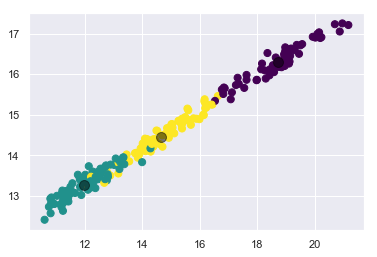

In [60]:
x = 0  # Area
y = 1  # Perimeter
plt.scatter(X_seed.iloc[:,x], X_seed.iloc[:,y],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,x], centers[:,y], c = 'black', s = 100, alpha = 0.5);

In [61]:
mat = confusion_matrix(y_test, y_model)
print(mat)

[[60  0 10]
 [ 0 68  2]
 [ 1  9 60]]


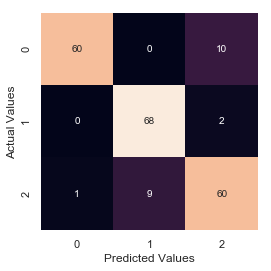

In [62]:
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

### Step D: PCA

In [63]:
model = PCA(n_components = 2) 
model.fit(X_seed) 
X_2D = model.transform(X_seed)

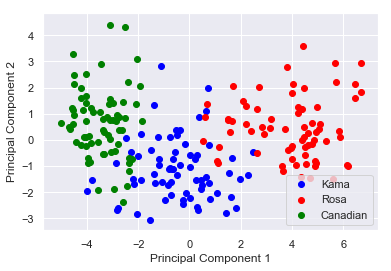

In [64]:
for label, color, i in zip(('Kama', 'Rosa', 'Canadian'), ('blue', 'red' ,'green'), (0, 1, 2)):
    plt.scatter(X_2D[Y_seed == i, 0], X_2D[Y_seed == i, 1], label = label, color = color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc = 'lower right')

In [65]:
model.explained_variance_ratio_

array([0.8293852 , 0.16363245])

In [66]:
sum(model.explained_variance_ratio_)

0.9930176488286904

### Step E: Standardization Before K-Means

In [67]:
X_std_seed = StandardScaler().fit_transform(X_seed)
X_std_seed[:5,:]

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05,
         3.04218199e-01,  1.41701823e-01, -9.86151745e-01,
        -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01,
        -1.68624664e-01,  1.97432229e-01, -1.78816620e+00,
        -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00,
        -7.63637453e-01,  2.08047544e-01, -6.67479334e-01,
        -1.18919199e+00],
       [-3.47091272e-01, -4.75333162e-01,  1.03938133e+00,
        -6.88978054e-01,  3.19508356e-01, -9.60817955e-01,
        -1.22998260e+00],
       [ 4.45257175e-01,  3.30595037e-01,  1.37450924e+00,
         6.66655647e-02,  8.05159035e-01, -1.56349549e+00,
        -4.75356297e-01]])

In [68]:
kmeans = KMeans(n_clusters=3, random_state = 1)
kmeans.fit(X_std_seed)
y_model = kmeans.predict(X_std_seed) 
y_model

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [69]:
acc_score = accuracy_score(y_test, y_model)
acc_score

0.919047619047619

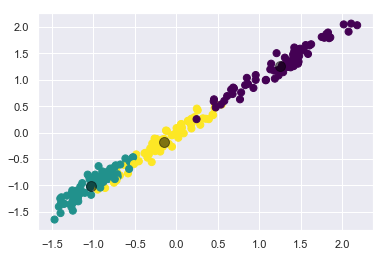

In [70]:
x = 0  # Area
y = 1  # Perimeter
plt.scatter(X_std_seed[:,x], X_std_seed[:,y], c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,x], centers[:,y], c = 'black', s = 100, alpha = 0.5)

In [71]:
mat = confusion_matrix(y_test, y_model)
print(mat)

[[65  0  5]
 [ 0 66  4]
 [ 2  6 62]]


Text(89.18, 0.5, 'Actual Values')

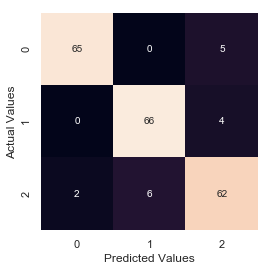

In [72]:
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

### Step F: Normalization Before K-Means

In [73]:
sc.fit(X_seed)
X_norm_seed = sc.transform(X_seed)
X_norm_seed[:5,:]

array([[0.44098206, 0.50206612, 0.5707804 , 0.48648649, 0.48610121,
        0.18930164, 0.34515017],
       [0.40509915, 0.44628099, 0.66243194, 0.36880631, 0.50106914,
        0.03288302, 0.21516494],
       [0.34938621, 0.34710744, 0.87931034, 0.22072072, 0.50392017,
        0.25145302, 0.1506647 ],
       [0.3068933 , 0.3161157 , 0.79310345, 0.2393018 , 0.53385602,
        0.19424255, 0.14081733],
       [0.52407932, 0.53305785, 0.86479129, 0.42736486, 0.66429081,
        0.07670104, 0.3229936 ]])

In [74]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(X_norm_seed)
y_model = kmeans.predict(X_norm_seed)
y_model

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
acc_score = accuracy_score(y_test, y_model)
acc_score

0.8904761904761904

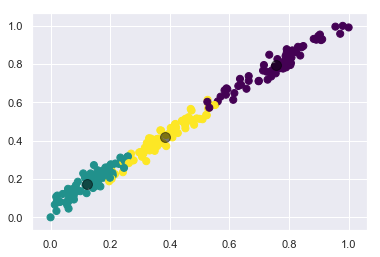

In [76]:
x = 0  # Area
y = 1  # Perimeter
plt.scatter(X_norm_seed[:,x], X_norm_seed[:,y], c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,x], centers[:,y], c = 'black', s = 100, alpha = 0.5)

In [77]:
mat = confusion_matrix(y_test, y_model)
print(mat)

[[62  0  8]
 [ 0 67  3]
 [ 2 10 58]]


Text(89.18, 0.5, 'Actual Values')

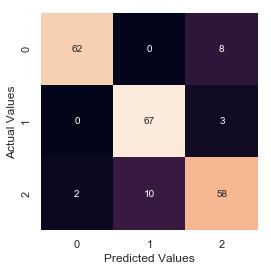

In [78]:
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')